# Task 6 – Exchanging Analytical Knowledge

Install dependencies: tensorflow, keras, scikit-image, pydot (`pip install -r requirements.txt`)

In [1]:
%matplotlib inline  
import numpy as np
from keras.datasets import cifar10
#from keras.applications.resnet50 import ResNet50, preprocess_input
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from keras.utils import np_utils
from skimage.transform import resize as imresize
from keras.applications.inception_v3 import InceptionV3, preprocess_input
#from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


**Task**: Load the cifar10 data set into two tuples x_train, x_test and y_train, y_test (https://keras.io/datasets/)

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

We are only working with a small part of the data as we train on cpu. Thus we have to reduce the amount of data...

**Task**: Sample the data with a factor of 1% and save it to respective vars.

In [3]:
sampleFactor = 0.01
x_train = x_train[0:int(len(x_train)*sampleFactor)]
y_train = y_train[0:int(len(y_train)*sampleFactor)]
x_test = x_test[0:int(len(x_test)*sampleFactor)]
y_test = y_test[0:int(len(y_test)*sampleFactor)]

**Task**: Define a list with all cifar10 classes (https://www.cs.toronto.edu/~kriz/cifar.html). Then retrieve some information on the train and test set.

In [4]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
type(cifar_classes)
num_classes = np.unique(y_train).shape[0]

print("There are {} train images and {} test images.".format(x_train.shape[0], x_test.shape[0]))
print('There are {} unique classes to predict.'.format(num_classes))
print('Example training images and their labels: ' + str([y[0] for y in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[y[0]] for y in y_train[0:10]]))

There are 500 train images and 100 test images.
There are 10 unique classes to predict.
Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


**Task**: Print the shape of an image. 

In [5]:
#Shape of an Image
x_train[0].shape

(32, 32, 3)

**Task**: Plot the first ten images of the dataset. 

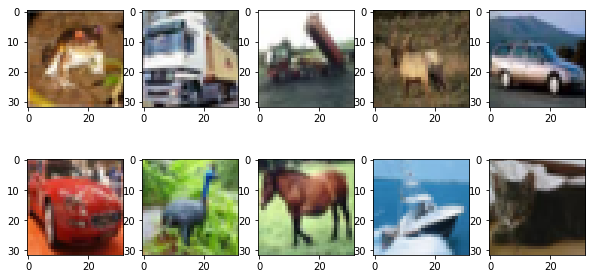

In [6]:
#Example images
fig = plt.figure(figsize=(10,5))
cols = 5
rows = 2
for i in range (1,cols*rows+1):
    image = x_train[i-1]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image)
plt.show()

**Task**: Split the labels into a categorial representation

In [7]:
#Label encoding
#shape before encoding
y_train.shape
#shape after encoding
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_train.shape

(500, 10)

**Task**: Define the following sequential CNN model:

- 2D Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
- Max Pool layer with size 2×2
- 2D Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
- Max Pool layer with size 2×2
- 2D Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
- Max Pool layer with size 2×2
- 2D Global Average Pooling layer
- Fully connected output layer (dense layer) with 10 units and a softmax activation function

Use the keras documentation at https://keras.io/ (e.g., convolutional or core)

Afterwards plot the model into a file (https://keras.io/visualization/#model-visualization). 

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

plot_model(model, show_shapes = True , to_file='model.png' , show_layer_names = True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

**Task:** Compile the model with binary crossentropy as a loss function and Adam as the optimizer. Print accuracy as the metric.

Read more about the Adam optimizer here https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/.

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

**Task**: Now we want to fit the model using a validation split of 20%. Experiment with different amount of epochs and batch sizes. Print the score of the model.

In [10]:
#Train/eval process
model.fit(x_train, y_train, batch_size=32, epochs=5,verbose=1, validation_split=0.2, shuffle=True)

score = model.evaluate(x_test, y_test)
print(score[1])

Train on 400 samples, validate on 100 samples
Epoch 1/5
400/400 [==============================] - 5s 11ms/step - loss: 2.7615 - acc: 0.8175 - val_loss: 2.8854 - val_acc: 0.8200
Epoch 2/5
400/400 [==============================] - 4s 10ms/step - loss: 2.9415 - acc: 0.8165 - val_loss: 2.8854 - val_acc: 0.8200
Epoch 3/5
400/400 [==============================] - 4s 10ms/step - loss: 2.9415 - acc: 0.8165 - val_loss: 2.8854 - val_acc: 0.8200
Epoch 4/5
400/400 [==============================] - 4s 10ms/step - loss: 2.9415 - acc: 0.8165 - val_loss: 2.8854 - val_acc: 0.8200
Epoch 5/5
100/100 [==============================] - 0s 3ms/step
0.8160000920295716


**Task**: Resize the images to 224x224. And plot an old and a new image for comparison.

/anaconda3/envs/aiss_py35/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/envs/aiss_py35/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


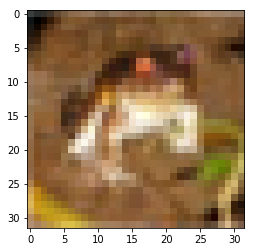

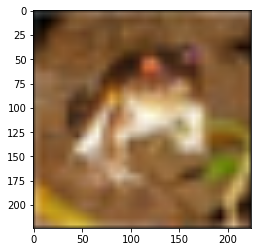

In [11]:
x_train_new = np.array([imresize(x_train[i], (224, 224, 3)) for i in range(0, len(x_train))]).astype('float32')
x_test_new = np.array([imresize(x_test[i], (224, 224, 3)) for i in range(0, len(x_test))]).astype('float32')

plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train_new[0])
plt.show()

**Task**: Create an InceptionV3 model named base_model with initialized weights from imagenet (https://keras.io/applications/#inceptionv3)

In [12]:
base_model = InceptionV3(weights='imagenet',include_top = False)

**Task**: Add layers to the Inception Model with a GlobalAveragePooling2D, a fully connected layer with a ReLu activation function, a Dropout Layer and a Prediction Layer for our 10 classes.

In [13]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(10,activation='softmax')(x)

**Task**: Freeze the Layers of the base_model

In [14]:
#Freezing layers of InceptionModel
for layer in base_model.layers:
    layer.trainable = False

**Task**: Print a summary of the base_model

In [15]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_5 (

**Task**: Now build a model starting with the input of the base_model and resulting in the predictions as an output. Summarize and plot the model as above.

In [16]:
model = Model(inputs=base_model.input,outputs=predictions)
model.summary()
plot_model(model, show_shapes=True, to_file='model_inception.png', show_layer_names=True) #change Outputfile name

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_5 (

**Task**: Print the names of the layers.

In [17]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d_4
2 batch_normalization_1
3 activation_1
4 conv2d_5
5 batch_normalization_2
6 activation_2
7 conv2d_6
8 batch_normalization_3
9 activation_3
10 max_pooling2d_4
11 conv2d_7
12 batch_normalization_4
13 activation_4
14 conv2d_8
15 batch_normalization_5
16 activation_5
17 max_pooling2d_5
18 conv2d_12
19 batch_normalization_9
20 activation_9
21 conv2d_10
22 conv2d_13
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_9
29 conv2d_11
30 conv2d_14
31 conv2d_15
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_19
42 batch_normalization_16
43 activation_16
44 conv2d_17
45 conv2d_20
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_16
52 conv2d_18
53 conv2d_21
54 conv2d_22
55 batch_normalization_13
56 batch_no

**Opt. Task**: How could you freeze more layers?

In [18]:
# We retrain last layers of the model
# Skip this step if only self added layers should be trained
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

**Task**: Compile the model with a loss function, an optimizer and additionally accuracy as a metric. If you have time left. Try a SGD optimizer instead.

In [19]:
#model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Task**: Train the model. You can experiment with epochs and batch sizes. But be careful it is a very large net that takes a lot of training. Use a validation split of 0.1

In [ ]:
#Train/eval process
model.fit(x_train_new, y_train, batch_size=128, epochs=5, validation_split=0.1, verbose=1, shuffle=True)
score  = model.evaluate(x_test_new, y_test)
print('Accuracy on the Test Images: ', score[1])

Train on 450 samples, validate on 50 samples
Epoch 1/5
128/450 [=======>......................] - ETA: 19:14 - loss: 2.6347 - acc: 0.0547

**Wrap-Up Question**: Why is the accuracy lower?

* small dataset in very large model (small due to performance issues for exercise)
* input layer could be flattened
* more detailed preprocessing
* higher dropout training
* more epochs or larger badges (risk of ram overflow)